# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Lorenza Lennyta Dewi
- Email: lorenzald123@gmail.com
- Id Dicoding: lorenza_ld

## Menentukan Pertanyaan Bisnis

- Bagaimana tren total penyewaan sepeda sepanjang waktu?
- Bagaimana distribusi penyewaan sepeda berdasarkan musim?
- Bagaimana proporsi penyewaan sepeda antara pengguna terdaftar dan pengguna kasual sepanjang tahun?

## Menyiapkan semua library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Membuat variabel "day" kemudian import file "day" <br>
Membuat variabel "hour" kemudian import file "hour" <br>
Kemudian Menampilkan 5 record teratas data "day" dan Menampilkan 5 record teratas data "hour" <br>

In [3]:
day = pd.read_csv('data/day.csv') 
hour = pd.read_csv('data/hour.csv') 
day.head() 
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [4]:
day.info() # Cek apakah terdapat null value dan tipe data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Tidak terdapat null value dan tipe data pada dataset day

In [5]:
day.isna().sum() # Menghitung kolom yang memiliki null value

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak terdapat kolom yang memiliki nilai null pada dataset day

In [6]:
day.duplicated().sum() # Cek duplikasi record

np.int64(0)

Tidak terdapat duplikasi data pada dataset day

In [7]:
day.describe() # Statistik deskriptif data day

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


fungsi describe menampilkan output statistika deskriptif dari dataset day meliputi count, mean, std, min, 25%, 50%, 75%, max

In [8]:
hour.info() # cek null dan tipe data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Tidak terdapat null value dan tipe data pada dataset hour

In [25]:
hour.isna().sum() # menghitung kolom yang memiliki null value

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak terdapat kolom yang memiliki nilai null pada dataset hour

In [26]:
hour.duplicated().sum() # menghitung duplikasi data

0

Tidak terdapat duplikasi data pada dataset hour

In [27]:
hour.describe() # statistik deskriptif data hour

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


fungsi describe menampilkan output statistika deskriptif dari dataset hour meliputi count, mean, std, min, 25%, 50%, 75%, max

### Cleaning Data

Hasil Assesing Data : <br>
Pada data day : <br>
    1. Tipe data pada kolom dteday adalah object <br>
    2. Tidak memiliki missing value <br>
    3, Tidak memiliki duplikasi data <br> <br>
Pada data hour : <br>
    1. Tipe data pada kolom dteday adalah object <br>
    2. Tidak memiliki missing value <br>
    3. Tidak memiliki duplikasi data <br>

Sehingga akan dilanjutkan dengan Cleaning data untuk mengubah menjadi datetime :

In [9]:
# Mengubah tipe data kolom dteday pada day dan hour menjadi datetime
day_column = ["dteday"]
for column in day_column:
    day[column] = pd.to_datetime(day[column])

hour_column = ["dteday"]
for column in hour_column:
    hour[column] = pd.to_datetime(hour[column])

## Exploratory Data Analysis (EDA)

### Explore ...

In [11]:
day.head() # Melihat 5 record teratas data day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Menampilkan 5 record teratas data day

In [12]:
hour.head() # Melihat 5 record teratas data hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Menampilkan 5 record teratas data hour

In [15]:
day.describe() # statistik deskriptif dari dataset day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Menampilkan statistik deskriptif dari dataset day

In [16]:
hour.describe() # statistik deskriptif dari dataset hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


Menampilkan statistik deskriptif dari dataset hour

array([[<Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'cnt'}>, <Axes: >]], dtype=object)

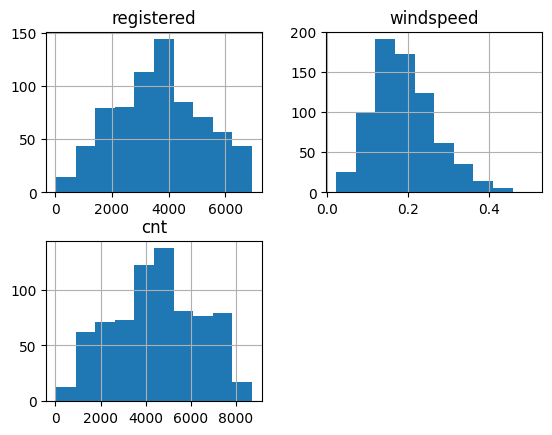

In [21]:
day[["registered", "windspeed", "cnt"]].hist() #data kolom registered dan cnt pada data day berdistribusi normal dan windspeed berdistribusi skew right

Menampilkan distribusi data untuk kolom registered dan cnt pada data day berdistribusi normal dan windspeed berdistribusi skew right

## Visualization & Explanatory Analysis

### Pertanyaan 1: 

- Bagaimana tren total penyewaan sepeda sepanjang waktu?

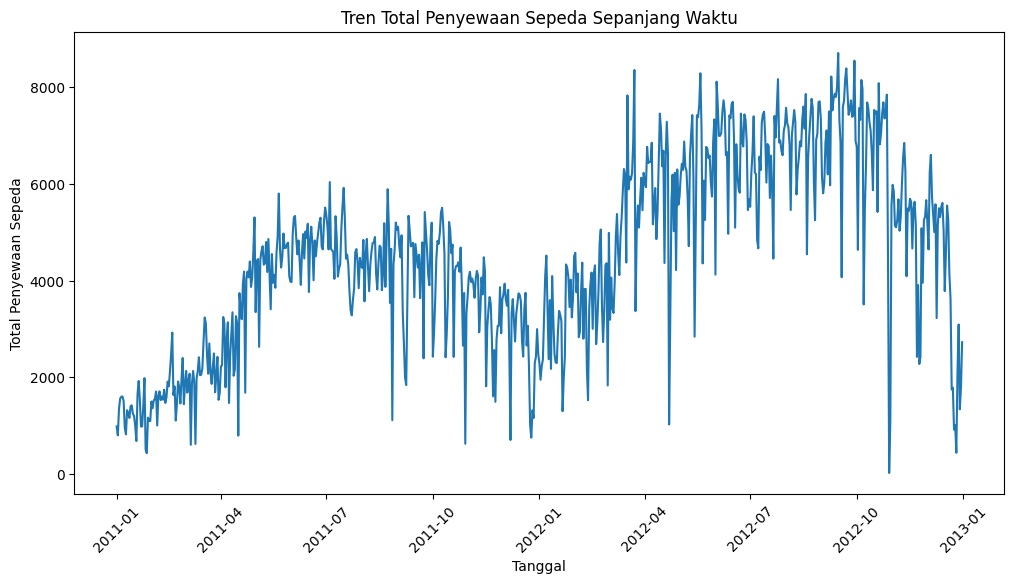

In [28]:
# Plot tren total penyewaan sepeda sepanjang waktu
plt.figure(figsize=(12, 6))
sns.lineplot(x='dteday', y='cnt', data=day)
plt.title('Tren Total Penyewaan Sepeda Sepanjang Waktu')
plt.xlabel('Tanggal')
plt.ylabel('Total Penyewaan Sepeda')
plt.xticks(rotation=45)
plt.show()

Menampilkan line graph total penyewaan sepanjang waktu dengan kesimpulan Grafik menunjukkan tren peningkatan penyewaan sepeda dari awal 2011 hingga puncaknya pada pertengahan 2012, dengan fluktuasi musiman yang signifikan. Penyewaan cenderung meningkat selama musim panas, mencapai lebih dari 8.000 penyewaan per hari, dan menurun drastis di musim dingin, terutama di akhir tahun 2012. Pola ini menunjukkan bahwa faktor cuaca atau musim mempengaruhi keputusan orang untuk menyewa sepeda, di mana cuaca yang lebih hangat meningkatkan minat penyewaan sementara cuaca dingin menurunkannya.

### Pertanyaan 2: 

- Bagaimana distribusi penyewaan sepeda berdasarkan musim?

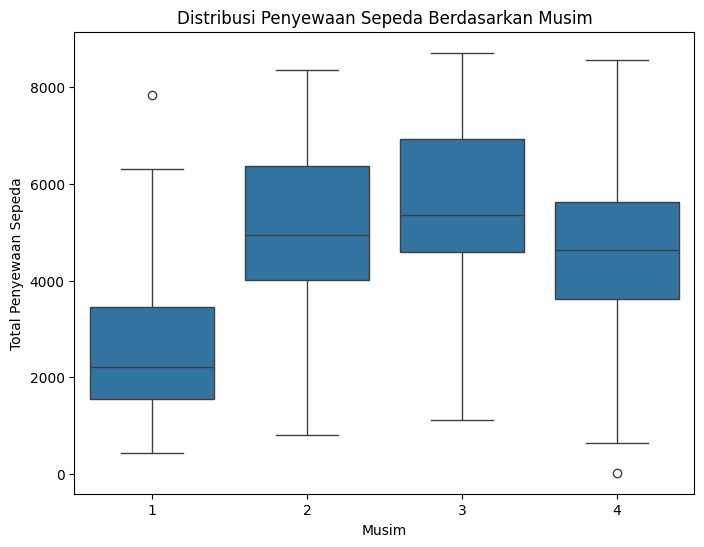

In [29]:
# Plot distribusi penyewaan sepeda berdasarkan musim
plt.figure(figsize=(8, 6))
sns.boxplot(x='season', y='cnt', data=day)
plt.title('Distribusi Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Total Penyewaan Sepeda')
plt.show()


Menampilkan boxplot distribusi penyewaan berdasarkan musim dengan kesimpulan Penyewaan sepeda terendah terjadi pada musim 1(springer), sedangkan tertinggi pada musim 3(fall).
Musim 2(summer) dan 3(fall) memiliki distribusi yang lebih lebar dan penyewaan yang lebih banyak.
Terdapat beberapa outlier, terutama di musim 1(springer) dan 4(winter), yang menunjukkan kejadian luar biasa dalam jumlah penyewaan sepeda.

### Pertanyaan 3:

- Bagaimana proporsi penyewaan sepeda antara pengguna terdaftar dan pengguna kasual sepanjang tahun?

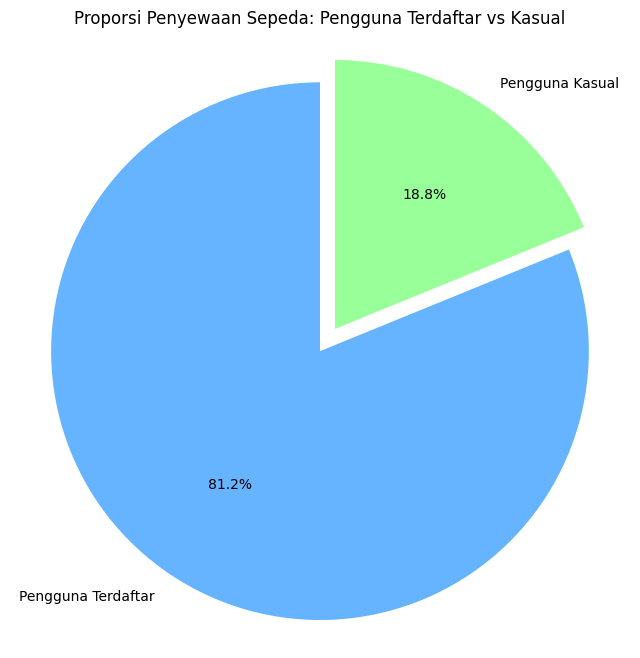

In [34]:
# Menghitung total penyewaan untuk pengguna terdaftar dan kasual sepanjang tahun
total_registered = day['registered'].sum()
total_casual = day['casual'].sum()

# Data untuk pie chart
labels = ['Pengguna Terdaftar', 'Pengguna Kasual']
sizes = [total_registered, total_casual]
colors = ['#66b3ff', '#99ff99']

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=(0, 0.1))
plt.title('Proporsi Penyewaan Sepeda: Pengguna Terdaftar vs Kasual')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


Dari diagram pie diatas proporsi penyewaan berdasarkan perbandingan  terdaftar vs kasual, perbandingannya sebanyak pengguna terdaftar(81.2%) vs pengguna kasual(18.8%)

## Conclusion

conclusion pertanyaan 1 : Bagaimana tren total penyewaan sepeda sepanjang waktu? <br>=> Grafik menunjukkan tren peningkatan penyewaan sepeda dari awal 2011 hingga puncaknya pada pertengahan 2012, dengan fluktuasi musiman yang signifikan. Penyewaan cenderung meningkat selama musim panas, mencapai lebih dari 8.000 penyewaan per hari, dan menurun drastis di musim dingin, terutama di akhir tahun 2012. Pola ini menunjukkan bahwa faktor cuaca atau musim mempengaruhi keputusan orang untuk menyewa sepeda, di mana cuaca yang lebih hangat meningkatkan minat penyewaan sementara cuaca dingin menurunkannya.

conclusion pertanyaan 2 : Bagaimana distribusi penyewaan sepeda berdasarkan musim? <br>=> Penyewaan sepeda terendah terjadi pada musim 1(springer), sedangkan tertinggi pada musim 3(fall).
Musim 2(summer) dan 3(fall) memiliki distribusi yang lebih lebar dan penyewaan yang lebih banyak.
Terdapat beberapa outlier, terutama di musim 1(springer) dan 4(winter), yang menunjukkan kejadian luar biasa dalam jumlah penyewaan sepeda.

conclusion pertanyaan 3 : Bagaimana proporsi penyewaan sepeda antara pengguna terdaftar dan pengguna kasual sepanjang tahun? <br>=> Dari diagram pie diatas proporsi penyewaan berdasarkan perbandingan  terdaftar vs kasual, perbandingannya sebanyak pengguna terdaftar(81.2%) vs pengguna kasual(18.8%)

### Data untuk dashboard

In [42]:
main_data = pd.merge(day, hour, on=["dteday"], how="left" )

In [43]:
main_data.to_csv("dashboard/main_data.csv", index=False)